# 엔티티 구분을 위한 CEA

In [ ]:
import pandas as pd

# CSV 불러오기
df = pd.read_csv("testData.csv", encoding="utf-8")

# Triple 저장 리스트
triples = []

# 모든 행에 대해 반복
for _, row in df.iterrows():
    subject = str(row["이름_별명"]).strip()
    if subject.lower() == "nan" or subject == "":
        continue  # 이름 없으면 pass

    for col in df.columns:
        if col == "이름_별명":
            continue  # 이름_별명은 주체니까 건너뜀

        value = str(row[col]).strip()
        if value.lower() == "nan" or value == "":
            continue  # 값 없으면 건너뜀

        triples.append((subject, col, value))

# 결과 일부 출력
for t in triples[:10]:
    print(t)

# triple 저장 (선택사항)
pd.DataFrame(triples, columns=["subject", "relation", "object"]).to_csv("triples_full.csv", index=False, encoding="utf-8-sig")


('김광로(金光老)', '본적주소', '불상')
('김광로(金光老)', '죄명', '내란')
('김광로(金光老)', '주문', '유형 10년')
('김광로(金光老)', '판결날짜', '1906-01-25 오전 12:00:00')
('김광로(金光老)', '사건개요', '의병에게 붙들려 의병당에 입당, 이들을 따라 민가옥 21채를 소각하고, 금품 1000냥을 탈취하였다.')
('김능백(金能伯)', '본적주소', '불상')
('김능백(金能伯)', '죄명', '내란')
('김능백(金能伯)', '주문', '유형 10년')
('김능백(金能伯)', '판결날짜', '1906-01-25 오전 12:00:00')
('김능백(金能伯)', '사건개요', '의병에게 붙들려 의병당에 입당, 이들을 따라 민가옥 21채를 소각하고, 금품 1000냥을 탈취하였다.')


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False


/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:1439: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  super().draw(renderer)
/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:1439: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  super().draw(renderer)
/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:1439: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  super().draw(renderer)
/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:1439: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  super().draw(renderer)
/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:1439: UserWarning: Glyph 51396 (\N{HANGUL SYLLABLE JOE}) missing from font(s) DejaVu Sans.
  super().draw(renderer)
/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:1439: U

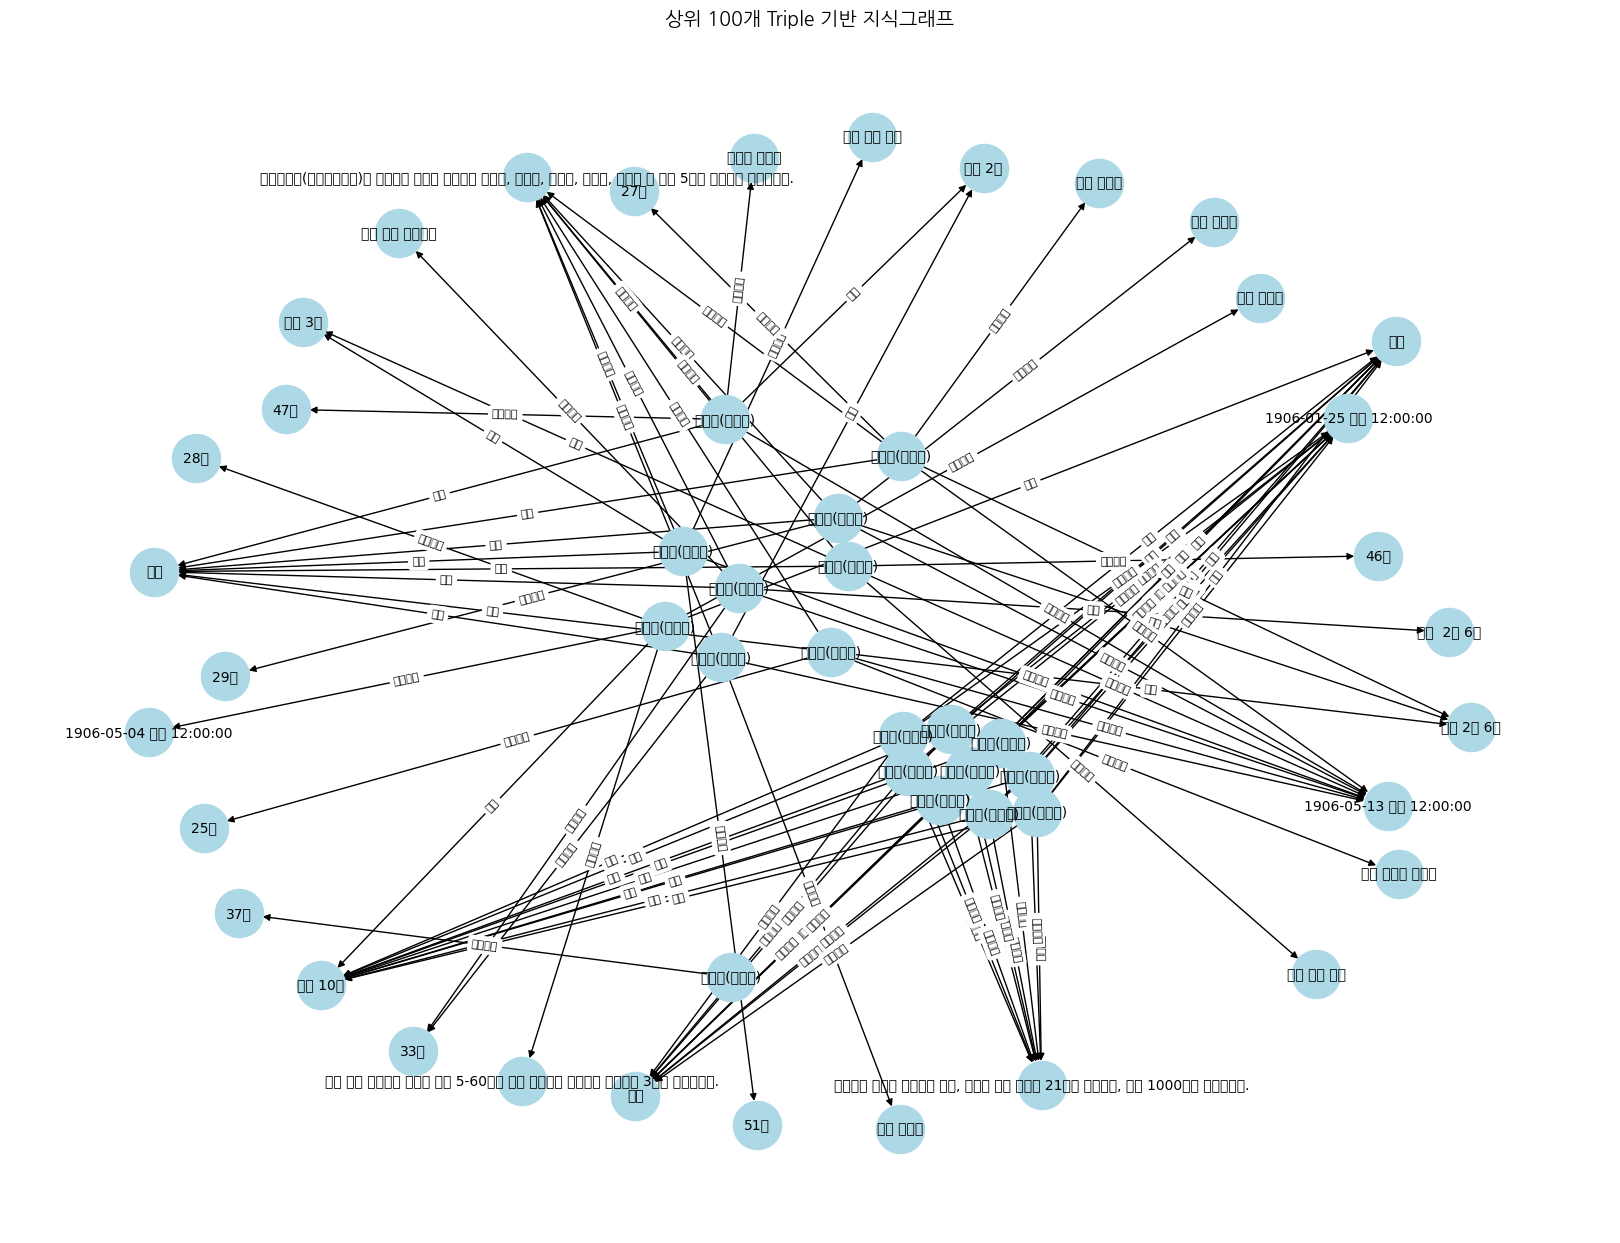

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# Triple CSV 불러오기
df = pd.read_csv("triples_full.csv", encoding="utf-8-sig")

# 앞에서 100개만 사용
df = df.head(100)

# 그래프 생성
G = nx.DiGraph()

for _, row in df.iterrows():
    subj, rel, obj = row["subject"], row["relation"], row["object"]
    G.add_edge(subj, obj, label=rel)

# 시각화
pos = nx.spring_layout(G, k=0.7)
plt.figure(figsize=(16, 12))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'label'), font_size=8)
plt.title("상위 100개 Triple 기반 지식그래프", fontsize=14)
plt.axis("off")
plt.show()
